In [ ]:
from google.colab import files
upload = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
import pandas as pd
df= pd.read_csv(io.BytesIO(upload['Mall_Customers.csv']))




In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(df[['Age','Spending Score (1-100)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
x = df['Age']
y = df['Spending Score (1-100)']

In [ ]:
x

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [ ]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Spending Score (1-100)')

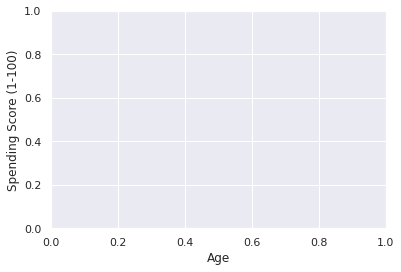

In [ ]:
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

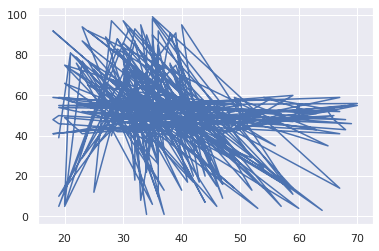

In [ ]:
plt.plot(x,y)

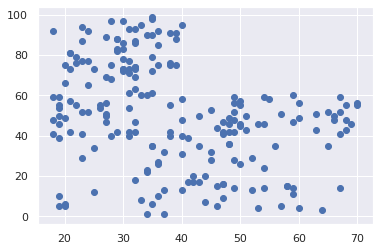

In [ ]:
plt.scatter(x,y)

In [ ]:
kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [43.29166667, 15.02083333]])

In [ ]:
df['cluster'] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
df.value_counts

<bound method DataFrame.value_counts of      CustomerID  Gender  ...  Spending Score (1-100)  cluster
0             1    Male  ...                      39        2
1             2    Male  ...                      81        1
2             3  Female  ...                       6        3
3             4  Female  ...                      77        1
4             5  Female  ...                      40        2
..          ...     ...  ...                     ...      ...
195         196  Female  ...                      79        1
196         197  Female  ...                      28        3
197         198    Male  ...                      74        1
198         199    Male  ...                      18        3
199         200    Male  ...                      83        1

[200 rows x 6 columns]>

In [ ]:
df['cluster'].value_counts()

1    57
3    48
0    48
2    47
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


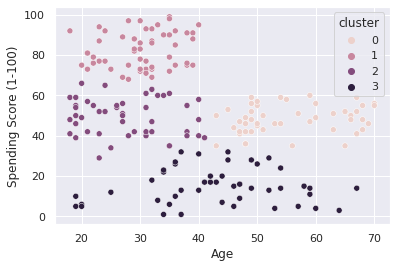

In [ ]:
sns.scatterplot(x,y,hue='cluster',data=df)


In [ ]:
k_range = range(1,12)
WCSS = []
for k in k_range:
  KM =KMeans(n_clusters=k)
  KM.fit(df[['Age','Spending Score (1-100)']])
  WCSS.append(KM.inertia_)



In [ ]:
WCSS

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23830.033602505428,
 19566.522341377604,
 15523.684014328752,
 13109.952934341643,
 11466.731638972944,
 10215.107989130434,
 9367.716593128234]

Text(0, 0.5, 'WCSS')

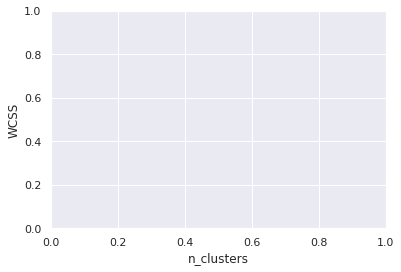

In [ ]:
plt.xlabel('n_clusters')
plt.ylabel('WCSS')

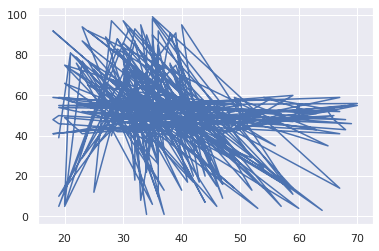

In [ ]:
plt.plot(x,y)

In [ ]:
x=k_range
y=WCSS

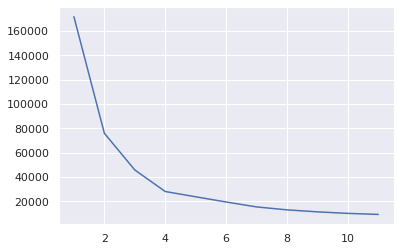

In [ ]:
plt.plot(x,y)